In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datenspende.utils import query_ch_df, query_pg_df
import datetime
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import re
import os
import glob
from functools import reduce
import seaborn as sns

In [2]:
ec_uid = np.load('extcoh(1).npy')

In [3]:
path = os.getcwd()+'/user_epoch/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

clean = []
csex = []
cage = []
cdf = []
for f in csv_files:

    df = pd.read_csv(f, index_col = 0)
    if int(f.split("/")[-1].split('.')[1][1:]) in ec_uid and int(f.split("/")[-1].split('.')[1][1:]) not in clean:
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):   
                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 

path = os.getcwd()+'/u_fat/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:

    df = pd.read_csv(f, index_col = 0)
    if int(f.split("/")[-1].split('.')[1][1:]) in ec_uid and int(f.split("/")[-1].split('.')[1][1:]) not in clean:
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):   
                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 
                
path = os.getcwd()+'/u_shb/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:

    df = pd.read_csv(f, index_col = 0)
    if int(f.split("/")[-1].split('.')[1][1:]) in ec_uid and int(f.split("/")[-1].split('.')[1][1:]) not in clean:
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):   
                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 
                
path = os.getcwd()+'/extcoh/'
csv_files = glob.glob(os.path.join(path, "*.csv"))
for f in csv_files:

    df = pd.read_csv(f, index_col = 0)
    if int(f.split("/")[-1].split('.')[1][1:]) in ec_uid and int(f.split("/")[-1].split('.')[1][1:]) not in clean:
        if len(df['phase'].unique()) >= 4 : #and 0 in df['phase'].unique() and 1 in df['phase'].unique()
            if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):   
                cdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                csex.append(re.split('(\d+)',demo_info)[0])
                cage.append(int(re.split('(\d+)',demo_info)[1]))
                clean.append(int(f.split("/")[-1].split('.')[1][1:])) 

In [4]:
path = os.getcwd()+'/match_c/'
csv_files = glob.glob(os.path.join(path, "*.csv"))

mclean = []
mcsex = []
mcage = []
mcdf = []
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f, index_col = 0)
    if len(df['phase'].unique()) >= 4: #and 0 in df['phase'].unique() and 1 in df['phase'].unique():
        if np.all([np.count_nonzero(df[df['phase']==ph]['hr'].notna()) > 100 for ph in df['phase'].unique()]):
                
                mcdf.append(df)
                demo_info = f.split("/")[-1].split('.')[0]
                
                mclean.append(int(f.split("/")[-1].split('.')[1][1:]))  
                mcsex.append(re.split('(\d+)',demo_info)[0])
                mcage.append(int(re.split('(\d+)',demo_info)[1]))

In [5]:
len(mclean)

509

In [6]:
perss_user = pd.DataFrame(data =  np.array([clean, csex, cage]).T,columns = ['uid', 'sex', 'age'])
match_user = pd.DataFrame(data =  np.array([mclean, mcsex, mcage]).T,columns = ['uid', 'sex', 'age'])
#mu_idx = [np.where(np.array(muid) == i)[0][0] for i in [int(i) for i in match_user[(match_user.sex == 'male')&(match_user.age == '60')]['uid'].iloc[:5].values]]
#pu_idx = np.where(np.array(uid) == int(perss_user[(perss_user.sex=='male')&(perss_user.age=='60')]['uid'].iloc[0]))[0][0]  
perss_user['c'] = 1
match_user['c'] = 1

In [7]:
ypis_pers = []
for pu in cdf:
    df = pu.copy()
    df = df.sort_values('date')
    df.start = pd.to_datetime(df.start)
    # take out days where there is no step entry at all 
    d_idx = df.groupby('date').sum()[df.groupby('date').sum()['steps'] == 0].index
    df['clean'] = df['date'].apply(lambda x: 1 if x in d_idx else 0)
    df = df[df['clean'] == 0]
    df = df.drop('clean',axis=1)
    #
    d = df.copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')

    xhd = np.zeros((24, 7,4))
    for ph in range(4):
        dph = d_agg[d_agg['phase'] == ph]
        if len(dph) > 0:
            dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()

            for wd in range(7):
                if len(dpg[dpg.day_of_week == wd]) == 24:
                    xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['steps'].values

    xhd[xhd == 0] = np.nan
 

    norm = d_agg[d_agg['phase'] == 0]['steps'].mean()


    w_pre = (xhd[:,:,0]/norm)/sum(sum(xhd[:,:,0]/norm))
    ypis = np.zeros((4))
    ypis[:] = np.nan
    for i in range(4):
        y_pi = np.nansum(w_pre * ((xhd[:,:,i]/norm) - (xhd[:,:,0]/norm) ))
        ypis[i] = y_pi
    ypis_pers.append(ypis)

In [ ]:
#bins = np.linspace(min(np.array(day_mean)[np.array(day_mean) != 0])-0.1, max(np.array(day_mean)[np.array(day_mean) != 0]), 20)

In [30]:
mn = perss_user.groupby(['sex','age']).sum() * 3
mn = mn.reset_index()
ma = match_user.groupby(['sex','age']).sum().reset_index()

In [45]:
mnm = pd.merge(mn, ma, how = 'outer', on=['sex','age'] ).dropna()

In [ ]:
# now some users dont have matches ie female 25 or too little matches

In [48]:
matched_idx = []
for p in range(len(mnm)):
    r = mnm.iloc[p]
    if r.c_x <= r.c_y:
        mid = np.random.choice(match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index,int(r.c_x) ,replace=False)
    elif r.c_x > r.c_y:
        mid = np.random.choice(match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index,int(r.c_y) ,replace=False)
        
    for i in mid:      
        matched_idx.append(i)

#matched_idx = list(set(matched_idx ))  

In [49]:
len(matched_idx)

487

In [51]:
# matched_idx = []
# for p in range(len(perss_user)):
#     r = perss_user.iloc[p]
#     try:
#         mid = np.random.choice(match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index,5,replace=False)
#         #match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index[:3]
#         for i in mid:
             
#             matched_idx.append(i)
#     except: 
#         continue
# matched_idx = list(set(matched_idx ))  

In [52]:


ypis_pers_c = []
for pu in matched_idx:
    
    df = mcdf[pu].copy()
    df = df.sort_values('date')
    df.start = pd.to_datetime(df.start)
    # take out days where there is no step entry at all 
    d_idx = df.groupby('date').sum()[df.groupby('date').sum()['steps'] == 0].index
    df['clean'] = df['date'].apply(lambda x: 1 if x in d_idx else 0)
    df = df[df['clean'] == 0]
    df = df.drop('clean',axis=1)
    #
    d = df.copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')

    xhd = np.zeros((24, 7,4))
    for ph in range(4):
        dph = d_agg[d_agg['phase'] == ph]
        if len(dph) > 0:
            dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()

            for wd in range(7):
                if len(dpg[dpg.day_of_week == wd]) == 24:
                    xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['steps'].values

    xhd[xhd == 0] = np.nan
 

    norm = d_agg[d_agg['phase'] == 0]['steps'].mean()


    w_pre = (xhd[:,:,0]/norm)/sum(sum(xhd[:,:,0]/norm))
    ypis = np.zeros((4))
    ypis[:] = np.nan
    for i in range(4):
        y_pi = np.nansum(w_pre * ((xhd[:,:,i]/norm) - (xhd[:,:,0]/norm) ))
        ypis[i] = y_pi
    ypis_pers_c.append(ypis)
    

In [53]:
mini = np.min([np.min(ypis_pers_c),np.min(ypis_pers)])
maxi = np.max([np.max(ypis_pers_c),np.max(ypis_pers)])

In [54]:
bins = np.linspace(mini-0.1, maxi, 20)

In [55]:
phases = ['pre', 'acute', 'sub-acute', 'post']

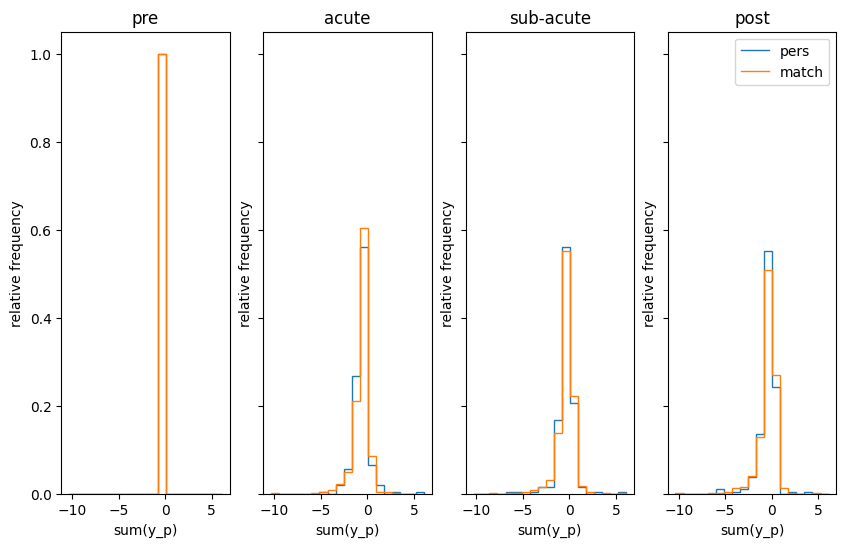

In [56]:
fig,ax=plt.subplots(1,4,figsize=(10,6),sharex=True, sharey=True)
for ph in range(4):
    n_dbt, _ = np.histogram([i[ph] for i in ypis_pers], bins=bins ) 
    ax[ph].stairs(n_dbt/len([i[ph] for i in ypis_pers]), bins, fill=False) 
    n_dbt, _= np.histogram([i[ph] for i in ypis_pers_c] ,bins=bins) 
    ax[ph].stairs(n_dbt/len([i[ph] for i in ypis_pers_c]), bins, fill=False) 
    ax[ph].set_title(phases[ph])
    ax[3].legend(['pers','match'] )
    ax[ph].set_xlabel('sum(y_p)');
    ax[ph].set_ylabel('relative frequency');


In [57]:
y_sum = [sum(y) for y in ypis_pers]
yc_sum = [sum(y) for y in ypis_pers_c]

In [58]:
from scipy.stats import ttest_ind
ttest_ind(y_sum, yc_sum, equal_var=False)

Ttest_indResult(statistic=0.2721548687993342, pvalue=0.7856267618831146)

In [59]:
ttest_ind([i[1] for i in ypis_pers], [i[1] for i in ypis_pers_c], equal_var=False)

Ttest_indResult(statistic=0.0679876684334117, pvalue=0.9458264207601261)

## HR


In [60]:
ypis_pers = []
for pu in cdf:
    df = pu.copy()
    df = df.sort_values('date')
    df.start = pd.to_datetime(df.start)
    # take out days where there is no step entry at all 
    d_idx = df.groupby('date').sum()[df.groupby('date').sum()['steps'] == 0].index
    df['clean'] = df['date'].apply(lambda x: 1 if x in d_idx else 0)
    df = df[df['clean'] == 0]
    df = df.drop('clean',axis=1)
    #
    d = df.copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')

    xhd = np.zeros((24, 7,4))
    for ph in range(4):
        dph = d_agg[d_agg['phase'] == ph]
        if len(dph) > 0:
            dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()

            for wd in range(7):
                if len(dpg[dpg.day_of_week == wd]) == 24:
                    xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['hr'].values

    xhd[xhd == 0] = np.nan
 

    norm = d_agg[d_agg['phase'] == 0]['hr'].mean()


    w_pre = (xhd[:,:,0]/norm)/sum(sum(xhd[:,:,0]/norm))
    ypis = np.zeros((4))
    ypis[:] = np.nan
    for i in range(4):
        y_pi = np.nansum(w_pre * ((xhd[:,:,i]/norm) - (xhd[:,:,0]/norm) ))
        ypis[i] = y_pi
    ypis_pers.append(ypis)

In [61]:
#bins = np.linspace(min(np.array(day_mean)[np.array(day_mean) != 0])-0.1, max(np.array(day_mean)[np.array(day_mean) != 0]), 20)

In [62]:
# matched_idx = []
# for p in range(len(perss_user)):
#     r = perss_user.iloc[p]
#     #mid = np.random.choice(match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index,3,replace=False)
#     try:
#         mid = np.random.choice(match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index,3,replace=False)
#         #match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index[:3]
#         for i in mid:
#             matched_idx.append(i)
#     except: 
#         continue
#     #match_user[(match_user.sex == r.sex)&(match_user.age == r.age)].index[:3]
#     #for i in mid:
#     #    matched_idx.append(i)
# matched_idx = list(set(matched_idx ))  

ypis_pers_c = []
for pu in matched_idx:
    
    df = mcdf[pu].copy()
    df = df.sort_values('date')
    df.start = pd.to_datetime(df.start)
    # take out days where there is no step entry at all 
    d_idx = df.groupby('date').sum()[df.groupby('date').sum()['steps'] == 0].index
    df['clean'] = df['date'].apply(lambda x: 1 if x in d_idx else 0)
    df = df[df['clean'] == 0]
    df = df.drop('clean',axis=1)
    #
    d = df.copy()
    d['steps'] = d['steps'].fillna(0)
    d['steps'] = d['steps'] + 1

    df_aggv = pd.merge(d[['start','hr','rhr', '% of MHR', 'sleep']].set_index('start').resample('60min').mean().reset_index(),d[['start','steps']].set_index('start').resample('60min').sum().reset_index(),how='outer',on='start')
    d_agg = pd.merge(df_aggv, d[['start','date','day_of_week','weekend','dt','day_totest','week_totest', 'phase', 'source','id']].set_index('start').resample('60min').first().reset_index(),how='outer',on='start')

    xhd = np.zeros((24, 7,4))
    for ph in range(4):
        dph = d_agg[d_agg['phase'] == ph]
        if len(dph) > 0:
            dpg = dph.groupby(by=[dph.day_of_week,dph.start.dt.time]).mean().reset_index()

            for wd in range(7):
                if len(dpg[dpg.day_of_week == wd]) == 24:
                    xhd[:,wd, ph] = dpg[dpg.day_of_week == wd]['hr'].values

    xhd[xhd == 0] = np.nan
 

    norm = d_agg[d_agg['phase'] == 0]['hr'].mean()


    w_pre = (xhd[:,:,0]/norm)/sum(sum(xhd[:,:,0]/norm))
    ypis = np.zeros((4))
    ypis[:] = np.nan
    for i in range(4):
        y_pi = np.nansum(w_pre * ((xhd[:,:,i]/norm) - (xhd[:,:,0]/norm) ))
        ypis[i] = y_pi
    ypis_pers_c.append(ypis)
    

In [63]:
mini = np.min([np.min(ypis_pers_c),np.min(ypis_pers)])
maxi = np.max([np.max(ypis_pers_c),np.max(ypis_pers)])

In [64]:
bins = np.linspace(mini-0.1, maxi, 20)

In [65]:
phases = ['pre', 'acute', 'sub-acute', 'post']

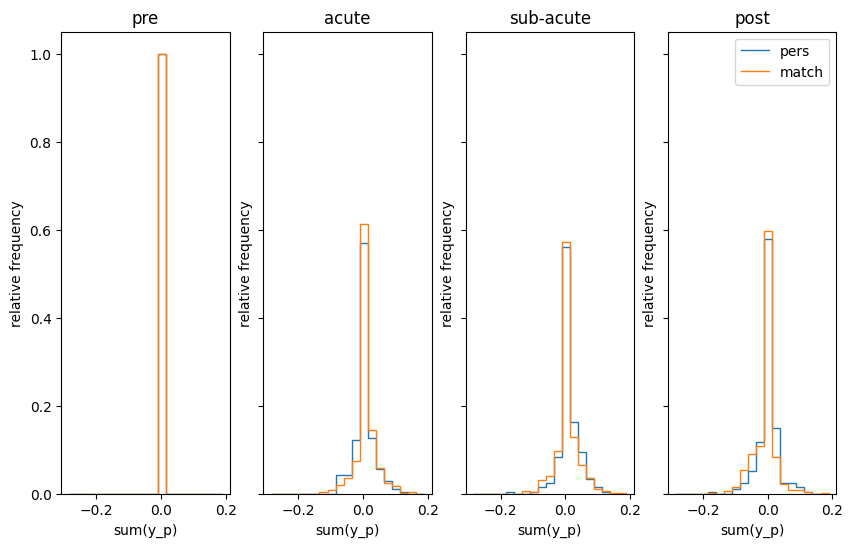

In [66]:
fig,ax=plt.subplots(1,4,figsize=(10,6),sharex=True, sharey=True)
for ph in range(4):
    n_dbt, _ = np.histogram([i[ph] for i in ypis_pers], bins=bins ) 
    ax[ph].stairs(n_dbt/len([i[ph] for i in ypis_pers]), bins, fill=False) 
    n_dbt, _= np.histogram([i[ph] for i in ypis_pers_c] ,bins=bins) 
    ax[ph].stairs(n_dbt/len([i[ph] for i in ypis_pers_c]), bins, fill=False) 
    ax[ph].set_title(phases[ph])
    ax[3].legend(['pers','match'] )
    ax[ph].set_xlabel('sum(y_p)');
    ax[ph].set_ylabel('relative frequency');


In [67]:
y_sum = [sum(y) for y in ypis_pers]
yc_sum = [sum(y) for y in ypis_pers_c]

In [68]:
from scipy.stats import ttest_ind
ttest_ind(y_sum, yc_sum, equal_var=False)

Ttest_indResult(statistic=1.2689643505004724, pvalue=0.20517683431020511)

In [69]:
ttest_ind([i[1] for i in ypis_pers], [i[1] for i in ypis_pers_c], equal_var=False)

Ttest_indResult(statistic=-1.0831500930077824, pvalue=0.27937421658642053)